# EXPERIMENT NO 6

# Reinforcement learning using python

In [4]:
import numpy as np
import pylab as pl
import networkx as nx


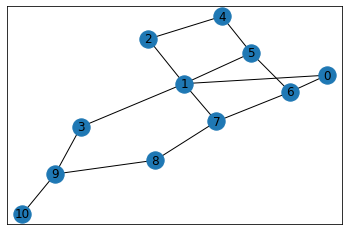

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]
Trained Q matrix:
[[  0.          51.19359613   0.           0.           0.
    0.          40.9548769    0.           0.           0.
    0.        ]
 [ 40.9548769    0.          40.9548769   63.99199516   0.
   40.9548769    0.          51.19359613   0.      

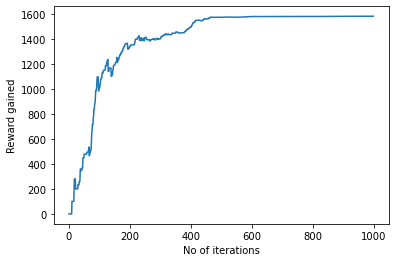

In [5]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
(1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
(8, 9), (7, 8), (1, 7), (3, 9)]

goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()

MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]]= 0
        # reverse of point

M[goal, goal]= 100
print(M)

# add goal point round trip
# Q matrix
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

# Gamma (learning parameter).
gamma = 0.8

# Initial state. (Usually to be chosen at random)
initial_state = 1


# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = M[state,]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action

# Get available actions in the current state
available_action = available_actions(initial_state)
# This function chooses at random which action to be performed within the range
# of all the available actions.


def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action,1))
    return next_action

# Sample next action to be performed
action = sample_next_action(available_action)
# This function updates the Q matrix according to the path selected and the Q
# learning algorithm


def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    # Q learning formula
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    
    if (np.max(Q) > 0):
        return(np.sum(Q / np.max(Q)*100))
    else:
        return (0)
    
# Updates the Q-Matrix according to the path chosen
# Update Q matrix
update(initial_state,action,gamma)
#----------------------------------------------------------------------------------------------

# Training
scores = []

# Train over 100 iterations. (Re-iterate the process above).
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state,action,gamma)
    scores.append(score)
    
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)


#----------------------------------------------------------------------------------------------


# Testing
# Goal state = 5
# Best sequence path starting from 2 -> 2, 3, 1, 5


current_state = 0
steps = [current_state]
while current_state != 10:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
    
# Print selected sequence of steps
print("Most efficient path:")
print(steps)

pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------

# 